# Bencharking the benefit of Rust 1.36 for Sophia

This benchmark compares the performances of the [sophia](https://github.com/pchampin/sophia_rs) library
between Rust 1.35 and Rust 1.36. In the latter,
[a new implementation of HashMap](https://blog.rust-lang.org/2019/07/04/Rust-1.36.0.html#a-new-hashmapk,-v%3E-implementation)
was introduced, promising faster operations and lower memory consuption.

It was executed on an Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, with 8 GiB of RAM.

## TL;DR

First, remember that `sophia` is an implementation with several indexes, designed to be fast to respond queries, but not so fast to load (because the indexes need to be populated). `sophia_lg` uses no index, so it loads faster and consumes less memory, but responds more slowly.

The effect of the new implementation is most visible in the loading time:
`sophia` loading time decreases by up to 50%, making it practically as fast as `sophia_lg`.
This is nice, because the plan is to add more indexes to `sophia` in the future;
this shows that the overhead should be quite reasonable.

The effect on memory consumption and query time are less impressive,
but there seem to be a slight improvement, which is nice.

In [1]:
%matplotlib inline
from plot_utils import *
color_key["sophia-rust136"] = color_key["sophia"]
color_key["sophia_lg-rust136"] = color_key["sophia_lg"]
color_key["sophia-rust135"] = 'gray'
color_key["sophia_lg-rust135"] = 'lightGray'

## The `query` test

This test consists in loading an N-Triple file in memory,
and querying all the triples with a given subject and object.

* `sophia`: [sophia](https://github.com/pchampin/sophia_rs) commit 405296e9f
  compiled with rustc 1.35.0 / 1.36.0 respectively
  (using [FastGraph](https://docs.rs/sophia/latest/sophia/graph/inmem/type.FastGraph.html),
   a graph using a HashSet and two HashMaps for indexing)
* `sophia_lg`: [sophia](https://github.com/pchampin/sophia_rs) commit 405296e9f
  compiled with rustc 1.35.0 / 1.36.0 respectively
  (using [LightGraph](https://docs.rs/sophia/latest/sophia/graph/inmem/type.LightGraph.html),
   a graph simply storing its triples in a HashSet, without any index)

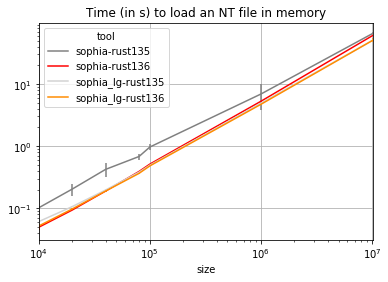

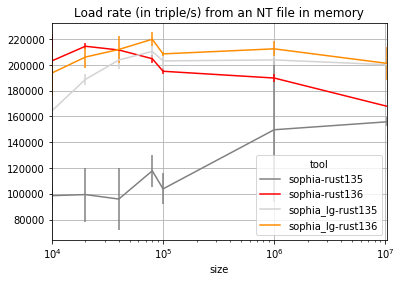

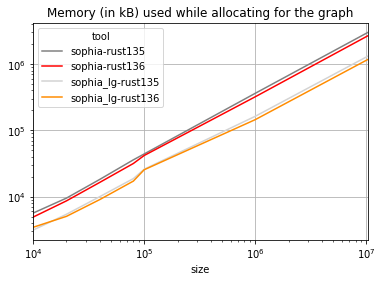

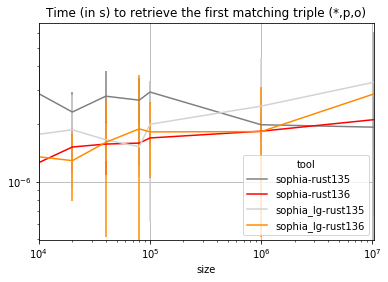

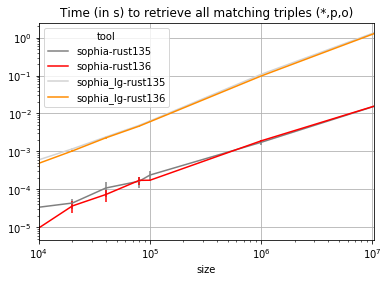

In [2]:
plot_query_stats(load_data("query", 
                           "sophia-rust136",
                           "sophia-rust135", 
                           "sophia_lg-rust136", 
                           "sophia_lg-rust135",
                          ))